<p> <font size = "+2" color = #5642f4> Option 2: Pymaceuticals Inc </font> </p>
    <p> Anais Dotis-Georgiou </p>
    <p> 11/11/17 </p>

In [1]:
![]()

/bin/sh: -c: line 1: syntax error: unexpected end of file


In [2]:
from IPython.display import Image
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import sem


In [3]:
file_path_one = "Raw_Data/clinicaltrial_data.csv"
file_path_two = "Raw_Data/mouse_drug_data.csv"
trial = pd.read_csv(file_path_one)
mouse = pd.read_csv(file_path_two)
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
merged = trial.merge(mouse, how='outer', on='Mouse ID')
merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


<p> <font size = "+2"> Tumor Response to Treatement </font> </p>

In [6]:
response = pd.DataFrame(merged.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
response = response.reset_index()
response_pivot = response.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
response_pivot.head()
response_pivot = response_pivot.reset_index()
response_pivot


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [7]:
samples = response_pivot.values.T.tolist()
samples_interest = samples[2:10]
samples_interest
sem_samples = [sem(x) for x in samples_interest]
sem_samples

[2.0477566291416038,
 2.2059693464844656,
 2.6717278012693639,
 2.6166913913052574,
 2.4790693897668592,
 2.2200419413215871,
 1.0310307963891476,
 2.4891561307817631]

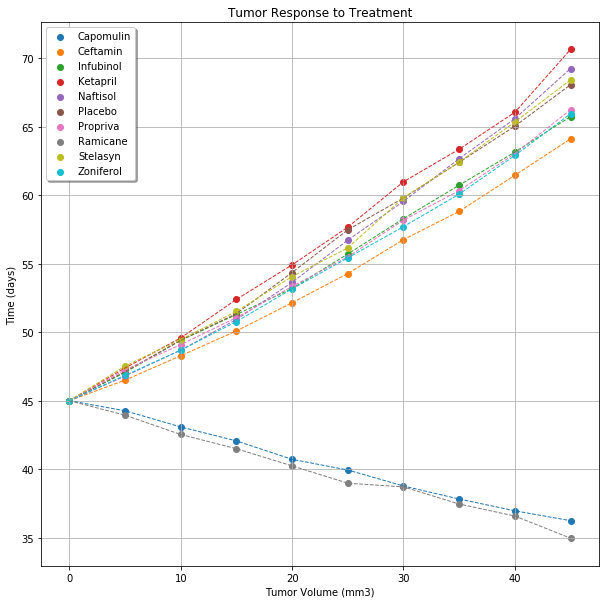

In [13]:
timepoint = response_pivot.iloc[:,0]
drug_col = np.arange(1,len(response_pivot.columns),1)
drug = [response_pivot.iloc[:,x] for x in drug_col]
length = np.arange(0,len(drug_col),1)
labels = ["Capomulin",
          "Ceftamin", 
          "Infubinol", 
          "Ketapril", 
          "Naftisol", 
          "Placebo", 
          "Propriva", 
          "Ramicane",
          "Stelasyn",
          "Zoniferol"]
plt.figure(figsize=(10,10))
[plt.scatter(timepoint, drug[x]) for x in length]
plt.legend(loc='upper left', shadow=True)
[plt.plot(timepoint, drug[x], linestyle= 'dashed', linewidth=1, label = labels[x]) for x in length]
#plt.errorbar(np.arange(timepoint, drug[x], yerr=sem_samples, alpha=0.5) for x in length
plt.title("Tumor Response to Treatment")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time (days)")
plt.grid()
plt.show()




<p> <font size = "+2"> Metastatic Sites Rate </font> </p>

In [9]:
metastatic = pd.DataFrame(merged.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sum())
metastatic = metastatic.reset_index()
metastatic_pivot = metastatic.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
metastatic_pivot = metastatic_pivot.reset_index()
metastatic_pivot



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0,0,0,0,0,0,0,0,0,0
1,5,4,8,7,7,6,9,8,3,6,4
2,10,8,12,14,13,11,20,13,6,11,11
3,15,9,15,19,16,18,25,13,8,18,17
4,20,15,20,21,23,23,29,17,8,20,22
5,25,18,27,23,31,27,33,19,15,22,27
6,30,24,31,27,37,31,34,21,18,25,29
7,35,26,29,20,39,34,37,23,20,25,32
8,40,29,33,21,41,37,38,25,22,19,39
9,45,31,35,19,37,33,36,18,25,19,43


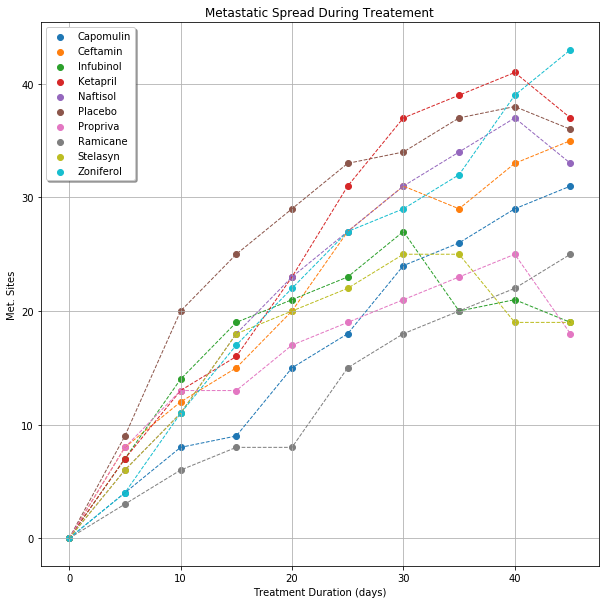

In [10]:
timepoint = response_pivot.iloc[:,0]
drug_col = np.arange(1,len(metastatic_pivot.columns),1)
drug = [metastatic_pivot.iloc[:,x] for x in drug_col]
length = np.arange(0,len(drug_col),1)
labels = ["Capomulin",
          "Ceftamin", 
          "Infubinol", 
          "Ketapril", 
          "Naftisol", 
          "Placebo", 
          "Propriva", 
          "Ramicane",
          "Stelasyn",
          "Zoniferol"]
plt.figure(figsize=(10,10))
[plt.scatter(timepoint, drug[x]) for x in length]
plt.legend(loc='upper left', shadow=True)
[plt.plot(timepoint, drug[x], linestyle='dashed', linewidth=1, label = labels[x]) for x in length]
plt.title("Metastatic Spread During Treatement")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.show()


<p> <font size = "+2"> Survival Rates </font> </p>

In [11]:
mouse = pd.DataFrame(merged.groupby(["Drug", "Timepoint"])["Mouse ID"].count())
mouse = mouse.reset_index()
mouse_pivot = mouse.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")
mouse_pivot = mouse_pivot.reset_index()
start_mouse = mouse_pivot.iloc[0,1:len(mouse_pivot.columns)]

mouse_pivot
start_mouse

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
Name: 0, dtype: int64

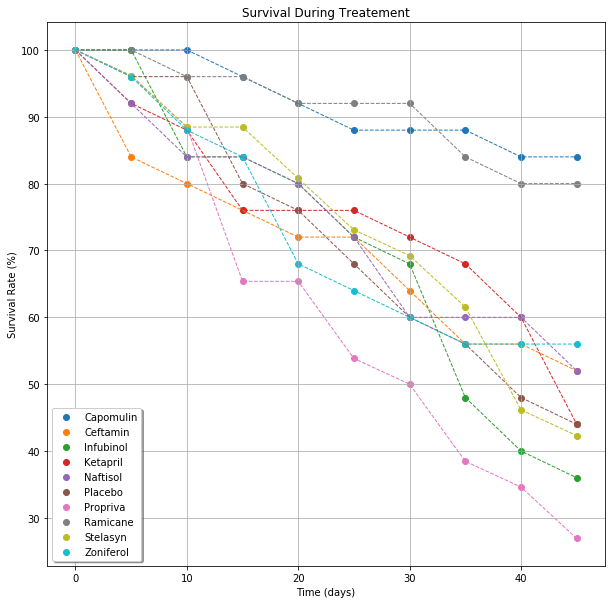

In [12]:
timepoint = response_pivot.iloc[:,0]
drug_col = np.arange(1,len(mouse_pivot.columns),1)
drug = [mouse_pivot.iloc[:,x] for x in drug_col]
length = np.arange(0,len(drug_col),1)
percent = [(drug[x]/start_mouse[x])*100 for x in length]
labels = ["Capomulin",
          "Ceftamin", 
          "Infubinol", 
          "Ketapril", 
          "Naftisol", 
          "Placebo", 
          "Propriva", 
          "Ramicane",
          "Stelasyn",
          "Zoniferol"]
plt.figure(figsize=(10,10))
[plt.scatter(timepoint, percent[x]) for x in length]
plt.legend(loc='lower left', shadow=True)
[plt.plot(timepoint, percent[x], linestyle='dashed', linewidth=1, label = labels[x]) for x in length]
plt.title("Survival During Treatement")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.show()


<p> <font size= "+2"> Tumor Change Over 45 Days </font> </p>

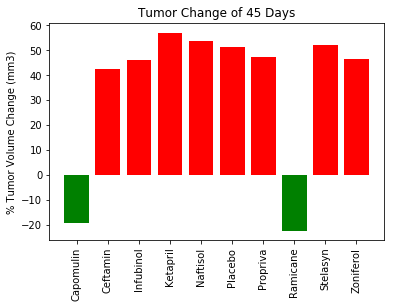

In [14]:
tumor = pd.DataFrame(merged.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
tumor = tumor.reset_index()
tumor_pivot = tumor.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
tumor_pivot = tumor_pivot.reset_index()
start_tumor = tumor_pivot.iloc[0,1:len(tumor_pivot.columns)]
end_tumor = tumor_pivot.iloc[-1,1:len(tumor_pivot.columns)]
diff_tumor = end_tumor-start_tumor
tumor_growth = (diff_tumor/start_tumor)*100

labels = ["Capomulin",
          "Ceftamin", 
          "Infubinol", 
          "Ketapril", 
          "Naftisol", 
          "Placebo", 
          "Propriva", 
          "Ramicane",
          "Stelasyn",
          "Zoniferol"]
x_axis = np.arange(0,len(start_tumor),1)

plt.bar(x_axis, tumor_growth, color = ['red' if tumor_growth[x] > 0 else 'green' for x in length ])
plt.ylabel("% Tumor Volume Change (mm3)")
plt.xticks(x_axis, labels, rotation='vertical')
plt.title("Tumor Change of 45 Days")
plt.show()


<p> <font size = "+2" color="cyan"> Conclusions </font> </p>

<p> 1. Ramicane and Capomulin are the most effective drugs. </p>
<p> 2. Ketapril and Naftisol are detrimental to healing. </p>
<P> 3. Ramicane outperforms Capomulin in the containment of metastatic sites. </p>
